In [1]:
%matplotlib inline
import matplotlib
import qutip as qp
#from sympy import *
import csv

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Math, Image, Latex

import scipy as sp

import itertools

#init_printing()

$$
\newcommand{\vp}{\varphi}
\newcommand{\bra}[1]{\langle{#1}\lvert}
\newcommand{\ket}[1]{\rvert{#1}\rangle}
\newcommand{\braket}[2]{\langle{#1}\lvert{#2}\rangle}
\newcommand{\braketOp}[3]{\langle{#1}\lvert{#2}\rvert{#3}\rangle}
$$

# 3-junction C-shunted flux qubit

### Qubit from article "revisited C-shunted flux qubit" fully simplified with no external field applied

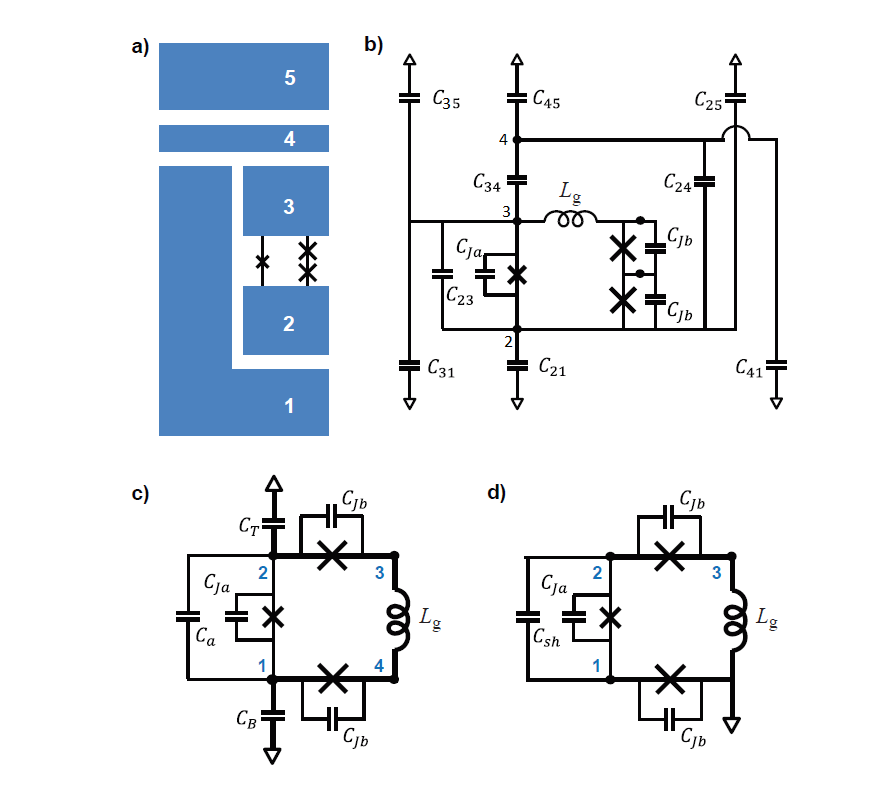

In [2]:
Image(filename='images/revisited_Cshunted_flux_qbit_from_3.png', width=400)

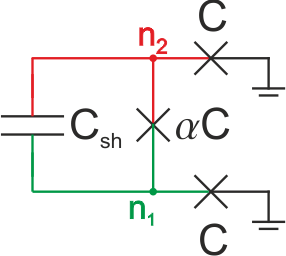

In [3]:
Image(filename='images/Cshunted_flux_qubit_3_junctions_simplified_no_inductance_from_3.png', width=300)

## Flux qubit Hamiltonian

**$\large{E_c}$ is defined as:$$E_c =\frac{4e^2}{2C}$$** in order to have good expression for the whole charging energy $E_C$ (see below).

In the Lagrangian, we initially will use the superconducting phases at the islands as variables: $(\vp_1, \vp_2, \vp_3)$. Then the voltage between islands $i,j$ could be written due to Josephson relation:

$$V_{ij} = \phi_j - \phi_i = \frac{\hbar}{2e}\frac{\partial({\vp_j-\vp_i})}{\partial{t}}$$

and hence $\phi_j = \frac{\hbar}{2e}\frac{\partial{\vp_j}}{\partial{t}}$

The charging energy is then the kinetic energy, which could be expressed as:

$$E_C = \frac{1}{2}\vec{\phi}^T \mathbf{C}\vec{\phi} = \frac{1}{2}\frac{\hbar^2}{4e^2}\dot{\vec{\vp}}^T \mathbf{C}\dot{\vec{\vp}}$$

where $\phi^T = (\phi_1, \phi_2, \phi_3 )$ and $\mathbf{C}$ is capacitance matrix, which element $C_{ij}$ is a coefficient of proportionality between charge on the island $q_i$ and electrostatic potential induced at any another island $\phi_j$:

\begin{equation}
\begin{pmatrix}
q_1\\q_2\\
\end{pmatrix}=
\begin{pmatrix}
C_{11}&C_{12}\\C_{21}&C_{22}\\
\end{pmatrix}\cdot
\begin{pmatrix}
 \phi_1\\ \phi_2\\
\end{pmatrix}
\end{equation}

Quite obviously, $\mathbf{C}$ must be symmetrical. Now we can write the Lagrangian:

$$
\mathbf{L} = T-P = \frac{1}{2}\frac{\hbar^2}{4e^2} \dot{\vec{\vp}}^T \mathbf{C} \dot{\vec{\vp}} + \alpha E_J \cos(\varphi_1 - \varphi_2 + \varphi_{ext}) + E_J \cos(\varphi_2) + E_J \cos(\varphi_1)$$

where $\varphi_{ext} = 2\pi \frac{\varPhi_{ext}}{\varPhi_0}$

or, introducing dimensionless $\mathbf{C}_{dl} = \frac{1}{C}\mathbf{C}$

$$\mathbf{T} = \frac{1}{2}\frac{C\hbar^2}{4e^2} \dot{\vec{\vp}}^T \mathbf{C}_{dl} \dot{\vec{\vp}}$$

The most mysterious thing about $E_J$ is that it is not so clear how to put external flux into it. According to Devoret's seminal paper, we must drop it into the closure branch, as we fixed another phases as independent variables, but I don't really understand this argument. And someone (particularly Oleg Astafiev) claims that the spectra and everything does not depend on where the magnetic flux is inserted. This is not obvious and is a thing to check.

Then we can make a Legendre transformations and introduce dual momenta:

$$\vec{p}^{(\vec{\vp})} = \frac{\partial L}{\partial \dot{\vec{\vp}}} = \frac{C\hbar^2}{4 e^2}
 \mathbf{C_{dl}} \dot{\vec{\vp}} = \frac{\hbar}{2e}\mathbf{C}\vec{V} = \hbar \frac{\vec{q}}{2e} = \hbar \mathbf{\hat{n}}$$ 
$$\vec{\dot{\vp}} = \frac{4e^2}{C\hbar} \mathbf{C_{dl}}^{-1}\mathbf{\hat{n}}$$

$\mathbf{\hat{n}}$ - vector operator of number of extra Cooper pairs that are exist on the superconducting islands (corresponding physical quantity can be negative, in case there is a lack of Cooper pairs at some island)
<br/>
Last equation trivially reflects the fact that the phase and number of Cooper pair operators are canonically conjugate.

The Hamiltonian reads:

$$\mathbf{H} =\vec{\dot{\vp}}^T\cdot\vec{q} - \mathbf{L}$$

\begin{align}
\mathbf{H} &= T + P = {E_C}{\mathbf{\hat{n}}}^T \mathbf{C_{dl}}^{-1} \space\mathbf{\hat{n}} - \alpha E_J \cos(\hat{\varphi}_1 - \hat{\varphi}_2 + \varphi_{ext}) - E_J \cos(\hat{\varphi}_2) - E_J \cos(\hat{\varphi}_1) \\
\end{align}

For this particular scheme, the $\mathbf{C}$ matrix is the followig:

$$\mathbf{C} = 
\begin{pmatrix}
(\alpha+1)C + C_{sh}&-\alpha C - C_{sh}\\-\alpha C - C_{sh}&(\alpha+1)C + C_{sh}\\
\end{pmatrix}$$

And $\mathbf{C}^{-1}$ is:

$$\mathbf{C}^{-1} = \frac{1}{(C_{sh}+(1 + \alpha) C)^2 - (C_{sh}+\alpha C)^2}
\begin{pmatrix}
(\alpha+1)C + C_{sh}&\alpha C + C_{sh}\\ \alpha C + C_{sh}&(\alpha+1)C + C_{sh}\\
\end{pmatrix}$$

corresponding value of $\mathbf{C_{dl}}^{-1}$:

$$\mathbf{C_{dl}}^{-1} = \frac{1}{(C_{sh}+1 + \alpha)^2 - (C_{sh}+\alpha)^2}
\begin{pmatrix}
\alpha+1 + C_{sh}&\alpha + C_{sh}\\ \alpha + C_{sh}&\alpha+1 + C_{sh}\\
\end{pmatrix}$$

### Global parameters definition

In [4]:
from scipy import constants as const

In [5]:
e = const.e # electron charge SI
hbar = const.hbar # plank constant SI (this is \hbar)
h = const.h

alpha = 0.6 # ratio of the smaller and larger josephson junctions areas
E_C = 17.6 # GHz, roughly corresponding to C = 4.5 fF
C = 4*e**2/2/(2*np.pi*E_C*hbar*10**9)
E_J = 36.2/alpha # GHz
Csh = 51e-15/C # in units of C (C equals to larger josephson junctions capacitance)

Z_r = 50 # Ohm - resonator line impendance
freq_r = 6.00 # GHz resonator frequency
omerga_r = freq_r*(2*np.pi)
beta = 0.043 # coupling parameter
#rms single-photon voltage in resonator
V_r0 = freq_r*np.sqrt(2*h*Z_r)

# inv_caps_matrix corresponds to inverse dimensionless capacitance matrix introduced earlier
N = 15
print( "E_C = ",E_C )
print( "E_J = ",E_J )
print( "alpha = ",alpha )
print( "Csh = ",Csh )
print( "C = ", C )

E_C =  17.6
E_J =  60.33333333333334
alpha =  0.6
Csh =  11.584787986305049
C =  4.40232484705716e-15


### Hamiltonian members constructors (QuTip)

In [6]:
def get_inv_dl_caps_matrix( Csh, alpha ):
    return 1/(2*(alpha + Csh) + 1)*np.array( [[1+alpha+Csh,alpha+Csh],[alpha + Csh,1 + alpha + Csh]] )

$\mathbf{H_c} = {E_C}{\mathbf{\hat{n}}}^T \mathbf{C_{dl}}^{-1} \space\mathbf{\hat{n}}$

In [8]:
def H_c( Ec, Csh, alpha, N ):
    islands_N = 2
    charge_ops = qp.tensor(qp.charge(N),
                           qp.identity(2*N+1)), \
                 qp.tensor(qp.identity(2*N+1),
                           qp.charge(N))
    
    H_c = qp.tensor(qp.qzero(2*N+1), qp.qzero(2*N+1))
    inv_dl_caps_matrix = get_inv_dl_caps_matrix( Csh, alpha )
    for i in range(0,islands_N):
        for j in range(0,islands_N):
            H_c += Ec*charge_ops[i]*inv_dl_caps_matrix[i,j]*charge_ops[j]
    return H_c

\begin{align}
\mathbf{H_J} = -\alpha E_J \cos(\hat{\varphi}_1 - \hat{\varphi}_2 + \varphi_{ext}) - E_J \cos(\hat{\varphi}_2) - E_J \cos(\hat{\varphi}_1) \\
e^{-i \hat{\varphi}_i} = \hat{\sigma}^+_i\\
\cos\space\hat{\varphi}_i = \frac{1}{2}( \hat{\sigma}^+_i + \hat{\sigma}^-_i )\\
\cos(\hat{\varphi}_1 - \hat{\varphi}_2 + \varphi_{ext} ) = \frac{1}{2}( \hat{\sigma}^-_1 \hat{\sigma}^+_2 e^{i\varphi_{ext}} + \hat{\sigma}^+_1 \hat{\sigma}^-_2 e^{-i\varphi_{ext}} )
\end{align}

In [9]:
def raising(N):
    return qp.Qobj(np.diag(np.ones(2*N),-1))
def lowering(N):
    return qp.Qobj(np.diag(np.ones(2*N),1))
# tunneling operator is available in QuTip and his result equals to "rising(N) + lowering(N)"

In [10]:
def H_J( E_J, alpha, phase_ext, N ):
    H1 = 0.5*( np.exp(1j*phase_ext)*qp.tensor(lowering(N),raising(N)) \
                         + np.exp(-1j*phase_ext)*qp.tensor(raising(N),lowering(N)) )
    H2 = qp.tensor(qp.identity(2*N+1), 0.5*qp.tunneling(2*N+1,1))
    H3 = qp.tensor(0.5*qp.tunneling(2*N+1,1), qp.identity(2*N+1))
        
    tunneling_ops = (H1,H2,H3)                  
    H_J = qp.tensor(qp.qzero(2*N+1), qp.qzero(2*N+1))
    E_Js = (-1)*np.array([alpha*E_J,E_J,E_J])
    for idx, tunneling_op in enumerate(tunneling_ops):
        H_J += E_Js[idx]*tunneling_op
    return H_J

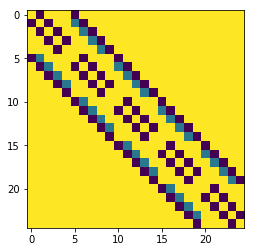

In [11]:
H_jj = H_J(E_J,alpha,0,2).full()
plt.imshow(H_jj.real)
plt.show()

### Functions for estimating and visualizing eigensystem of the problem

In [12]:
def array_eins(f_0,f_1,Nf,E_C,E_J,Csh,alpha,cooper_N,eigvals_N):
    arr_evals = []
    arr_einvects = []
    fs = np.linspace(f_0,f_1,Nf)
    for f in fs: 
        print('\r{:g} '.format(f), end='')
        H = H_J(E_J,alpha,f,cooper_N) + H_c(E_C,Csh,alpha,cooper_N)
        evals, einvects = H.eigenstates(sparse=True,eigvals=eigvals_N)
        arr_evals.append(evals)
        arr_einvects.append(einvects)
    return np.array(arr_einvects), np.array(arr_evals), np.array(fs)

In [13]:
def plot_eigenergies(engs,fs):
    for idx in range(1,engs.shape[1]):
        plt.plot(fs,engs[:,idx]-engs[:,0], label=r'$E_{%s}-E_{%s}$'%(idx,0))
    plt.plot( fs,engs[:,2]-engs[:,1], label=r"$E_2 - E_1$" )
    plt.plot( fs,(engs[:,3]-engs[:,0])/2, label=r"$(E_3 - E_0)/2$" )
    plt.plot( fs,(engs[:,2]-engs[:,0])/2, label=r"$(E_2 - E_0)/2$" )
    plt.legend()
    plt.grid()

In [14]:
def plot_eigenergies_custom(engs,fs):
    for idx in range(1,3):
        plt.plot(fs,engs[:,idx]-engs[:,0], label=r'$E_{%s}-E_{%s}$'%(idx,0))
    plt.plot( fs,engs[:,2]-engs[:,1], label=r"$E_2 - E_1$" )
    plt.plot( fs,(engs[:,3]-engs[:,0])/2, label=r"$(E_3 - E_0)/2$" )
    plt.plot( fs,(engs[:,2]-engs[:,0])/2, label=r"$(E_2 - E_0)/2$" )
    plt.legend()
    plt.grid()

# Eigenvalues plots from parameters

## Fixed parameters

3.76991 

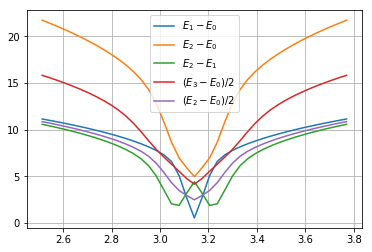

In [16]:
alpha = 0.6 # ratio of the smaller and larger josephson junctions areas
E_C = 17.6 # GHz, roughly corresponding to C = 4.5 fF
C = 4*e**2/2/(h*E_C*10**9)
E_J = 86 # GHz
Csh = 51e-15/C # in units of C (C equals to larger josephson junctions capacitance)

Z_r = 50 # Ohm - resonator line impendance
freq_r = 6.00 # GHz resonator frequency
omerga_r = freq_r*(2*np.pi)
beta = 0.043 # coupling parameter
#rms single-photon voltage in resonator
V_r0 = freq_r*np.sqrt(2*h*Z_r)

flux_pts = 41
flux_start = 0.4
flux_end = 0.6

phase_start = flux_start*2*np.pi
phase_end = flux_end*2*np.pi
cooper_N = 15
eigvals_N = 4

Evs, Engs, Fs = array_eins( phase_start,phase_end,flux_pts,\
                           E_C, E_J, Csh, alpha, cooper_N,eigvals_N )

plot_eigenergies_custom(Engs[:,:4],Fs)

In [ ]:
H_J(E_J,alpha,2*np.pi*0.5,1)

## Eigenvalues from parameters

In [ ]:
def array_eins_from_params_product(fl_pts,E_C_pts,E_J_pts,Csh_pts,alpha_pts,cooper_N_pts,eigvals_N_pts):
    arr_evals = []
    arr_einvects = []
    
    fparams = [fl_pts,E_C_pts,E_J_pts,Csh_pts,alpha_pts,cooper_N_pts,eigvals_N_pts]
    for i,param in enumerate(fparams):
        if( not isinstance(param,list) and not isinstance(param,np.ndarray)):
            fparams[i] = [param]
            
    # sorted order is preserved
    prod = itertools.product(*fparams)
    
    for params in prod:
        f = params[0]*2*np.pi
        E_C = params[1]
        E_J = params[2]
        Csh = params[3]
        alpha = params[4]
        cooper_N = params[5]
        eigvals_N = params[6]
        
        string = "\r"
        for val in params:
            string += str(val) + " "
        print(string,end="")
        H = H_J(E_J,alpha,f,cooper_N) + H_c(E_C,Csh,alpha,cooper_N)
        evals, einvects = H.eigenstates(sparse=True,eigvals=eigvals_N)
        arr_evals.append(evals)
        arr_einvects.append(einvects)
        
    return np.array(arr_einvects), np.array(arr_evals)

In [ ]:
def array_eins_from_params_lists(fl_pts,E_C_pts,E_J_pts,Csh_pts,alpha_pts,cooper_N_pts,eigvals_N_pts):
    arr_evals = []
    arr_einvects = []
    # sorted order is preserved
    
    params = [fl_pts,E_C_pts,E_J_pts,Csh_pts,alpha_pts,cooper_N_pts,eigvals_N_pts]
    lengths = []
    for i, param in enumerate(params):
        if( isinstance(param,list) ):
            lengths.append(len(param))
        elif( isinstance(param,np.ndarray) ):
            lengths.append(param.shape[0])
        else:
            lengths.append(1)
            
    max_len = max(lengths)
    
    for i,param in enumerate(params):
        if( not isinstance(param,(list, np.ndarray)) ):
            params[i] = itertools.repeat(param,max_len)
        
    iter_list = zip( *params )
    
    for i,vals in enumerate(iter_list):
        f = vals[0]*2*np.pi
        E_C = vals[1]
        E_J = vals[2]
        Csh = vals[3]
        alpha = vals[4]
        cooper_N = vals[5]
        eigvals_N = vals[6]
        
        print('\r{:g} {:g} {:g} {:g} {:g} {:g} {:g}'.format(f,E_C,E_J,Csh,alpha,cooper_N,eigvals_N), end='')
        H = H_J(E_J,alpha,f,cooper_N) + H_c(E_C,Csh,alpha,cooper_N)
        evals, einvects = H.eigenstates(sparse=True,eigvals=eigvals_N)
        arr_evals.append(evals)
        arr_einvects.append(einvects)
        
    return np.array(arr_einvects), np.array(arr_evals)

### from E_J

In [ ]:
alpha = 0.43 # ratio of the smaller and larger josephson junctions areas
E_C = 17.6 # GHz, roughly corresponding to C = 4.5 fF
#E_J = [36.2/alpha[0]] # GHz
E_J = list(36.2/alpha*np.linspace( 0.5, 1.5, 20 ))
Csh = 51e-15/C # in units of C (C equals to larger josephson junctions capacitance)
f = 0.5 # flux
#f = list(np.linspace(0.4,0.6,41))
cooper_N = 15
eigvals_N = 4

Evs, Engs = array_eins_from_params_product(f, E_C, E_J, Csh, alpha, cooper_N,eigvals_N )

plot_eigenergies_custom(Engs[:,:4],E_J)

### From E_C

In [ ]:
alpha = 0.43 # ratio of the smaller and larger josephson junctions areas
E_C = list(17.6*np.linspace(0.5,1.5,21)) # GHz, roughly corresponding to C = 4.5 fF
E_J = 36.2/alpha # GHz
Csh = 51e-15/C # in units of C (C equals to larger josephson junctions capacitance)
f = 0.5 # flux
cooper_N = 15
eigvals_N = 4

Evs, Engs = array_eins_from_params_product(f, E_C, E_J, Csh, alpha, cooper_N,eigvals_N )
Engs = np.array(Engs)
plot_eigenergies_custom(Engs[:,:4],E_C)

### From E_J while E_J/E_C = Const

In [ ]:
N_pts = 20
alpha = 0.43 # ratio of the smaller and larger josephson junctions areas
#E_C = 17.6
E_C = list(17.6*np.linspace( 0.5, 1.5, N_pts )) # GHz, roughly corresponding to C = 4.5 fF
#E_J = 36.2/alpha # GHz
E_J = list(36.2/alpha*np.linspace( 0.5, 1.5, N_pts ))
Csh = 51e-15/C # in units of C (C equals to larger josephson junctions capacitance)
f = 0.5 # flux
#f = list(np.linspace(0.4,0.6,41))
cooper_N = 15
eigvals_N = 4

Evs, Engs = array_eins_from_params_lists(f, E_C, E_J, Csh, alpha, cooper_N,eigvals_N )
Engs = np.array(Engs)
plot_eigenergies_custom(Engs[:,:4],E_C)

### from alpha

In [ ]:
alpha = list(np.linspace(0.4,0.6,20)) # ratio of the smaller and larger josephson junctions areas
E_C = 17.6 # GHz, roughly corresponding to C = 4.5 fF
E_J = 36.2/0.43 # GHz
Csh = 51e-15/C # in units of C (C equals to larger josephson junctions capacitance)
f = 0.5 # flux
cooper_N = 15
eigvals_N = 4

Evs, Engs = array_eins_from_params_product(f, E_C, E_J, Csh, alpha, cooper_N,eigvals_N )
Engs = np.array(Engs)
plot_eigenergies_custom(Engs[:,:4],alpha)

### from Csh

In [ ]:
alpha = [0.43] # ratio of the smaller and larger josephson junctions areas
E_C = [17.6] # GHz, roughly corresponding to C = 4.5 fF
E_J = [36.2/0.43] # GHz
Csh = list(51e-15/C*np.linspace(0.5,1.5,40)) # in units of C (C equals to larger josephson junctions capacitance)
f = [0.5] # flux
cooper_N = [15]
eigvals_N = [4]

Evs, Engs = array_eins_from_params_product(f, E_C, E_J, Csh, alpha, cooper_N,eigvals_N )
Engs = np.array(Engs)
plot_eigenergies_custom(Engs[:,:4],Csh)

### Fit experimental two tone results

In [ ]:
dir_path = "D:\\shamil_docs\\Qdev\\qubit_simulations\\Qutip&SymPy simulations of 3 junction Cshunted flux qbit based on 3\\Design v.1.0\\"
file1 = "E1E0WPD.csv"
file2 = "E2E0halfWPD.csv"
file3 = "E2E1WPD.csv"
with open(dir_path + file1, "r") as file:
    rows = list(csv.reader(file))
    data1 = np.array( rows, dtype=np.float ).T
with open(dir_path + file2, "r") as file:
    rows = list(csv.reader(file))
    data2 = np.array( rows, dtype=np.float ).T
with open(dir_path + file3, "r") as file:
    rows = list(csv.reader(file))
    data3 = np.array( rows, dtype=np.float ).T

In [ ]:
def square_residuals(params,f1,f2,f3,y1,y2,y3,cooperN):
    x_alpha = params[0]
    E_C = params[1]
    E_J = params[2]
    Csh = params[3]
    alpha = params[4]
    
    Evs, Engs1 = array_eins_from_params_product(x_alpha*f1,E_C,E_J,Csh,alpha,cooperN,2)
    Evs, Engs2 = array_eins_from_params_product(x_alpha*f2,E_C,E_J,Csh,alpha,cooperN,3)
    Evs, Engs3 = array_eins_from_params_product(x_alpha*f3,E_C,E_J,Csh,alpha,cooperN,4)
    Engs1 = np.array(Engs1)
    Engs2 = np.array(Engs2)
    Engs3 = np.array(Engs3)

    E1E0 = Engs1[:,1] - Engs1[:,0]
    E2E0half = (Engs2[:,2] - Engs2[:,0])/2
    E2E1 = Engs3[:,2] - Engs3[:,1]
    
    d = 0
    for i in range(len(y1)):
        d += (y1[i] - E1E0[i])**2   
    for i in range(len(y2)):
        d += (y2[i] - E2E0half[i])**2
    for i in range(len(y3)):
        d += (y3[i] - E2E1[i])**2
    return d

In [ ]:
def plot_eigenergies_custom2(engs):
    line1.set_ydata( engs[:,1]-engs[:,0])
    line2.set_ydata( engs[:,2]-engs[:,1] )
    line3.set_ydata( (engs[:,2]-engs[:,0])/2 )
    fig.canvas.draw()

In [ ]:
def plot_data(xk):
    x_alpha = xk[0]
    E_C = xk[1]
    E_J = xk[2]
    Csh = xk[3]
    alpha = xk[4]
    
    Evs, Engs1 = array_eins_from_params_product(x_alpha*data1[0],E_C,E_J,Csh,alpha,cooper_N,4)
    Engs1 = np.array(Engs1)
    print("Callback")
    plot_eigenergies_custom2(Engs1,data1[0])

In [ ]:
a = np.linspace(0,10,11)
a**2

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
x = data3[0]
y = data3[1]
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
n_pts = 41
xnew = np.linspace(min(x),max(x), n_pts)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

# Charge_zones_simulation and Coupling estimation

According to the article "revisited C-shunted flux qubits" interaction hamiltonian equals the followig:

$$\hat{H}_{q-r} = 2e(\hat{n}_1 - \hat{n}_2)\beta_c V_{r0}(\hat{a}^+ + \hat{a})$$

Where $V_{r0} = \nu_r \sqrt{2hZ_r}$ is the rms ground state resonator mode voltage for
a mode impedance $Z_r$
<br/>
$\nu_r$ - is the resonator frequency in Hz (SI)
<br/>
And $\beta_c = \frac{C_{34}C_{2g} - C_{42}С_{3g}}{2C_{24}C_{34} + (C_{24} + C_{34})[2(C_{23} + C_{Ja}) + C_{Jb}] + C_{3g}[2(C_{23} + C_{24} + C_{Ja} ) + C_{Jb}] + C_{2g}[2(C_{13} + C_{23} + C_{34} + C_{35} + C_{Ja}) + C_{Jb}]}$

### Coupling calculation

\begin{align}
\hat{H}_{q-r} = 2e(\hat{n}_1 - \hat{n}_2)\beta_c V_{r0}(\hat{a}^+ + \hat{a})\\
2\space level\space system: \hat{H}_{q-r} = g(\hat{\sigma}^+ + \hat{\sigma}^-)(\hat{a}^+ + \hat{a})
\end{align}

That means that we are going to calculate matrix $\bra{i}2e(\hat{n}_1 - \hat{n}_2)\beta_c V_{r0}\ket{j}$ where $i,j$ denotes number of eigenvector starting with the one with the least energy $\ket{0}$.<br/>
Firstly we will exctract value $\bra{0}2e(\hat{n}_1 - \hat{n}_2)\beta_c V_{r0}\ket{1}$ that is conjugate to $\bra{1}2e(\hat{n}_1 - \hat{n}_2)\beta_c V_{r0}\ket{0}$ and numerically equal to $g$ - the coupling constant.<br/>
Secondly we can examine non-zero non-diagonal elements of this matrix. This gives us the idea of what qubit state transitions are not prohibited by this interaction.

In [ ]:
def array_coupling_from_parameters_product(fl_pts,E_C_pts,E_J_pts,Csh_pts,alpha_pts,cooper_N_pts):
    multiplier = 2*e*V_r0*beta/h # GHz
    
    g = []
    
    fparams = [fl_pts,E_C_pts,E_J_pts,Csh_pts,alpha_pts,cooper_N_pts,2]
    for i,param in enumerate(fparams):
        if( not isinstance(param,list) and not isinstance(param,np.ndarray)):
            fparams[i] = [param]
            
    # sorted order is preserved
    prod = itertools.product(*fparams)
    
    Evs, Engs = array_eins_from_params_product(fl_pts,E_C_pts,E_J_pts,Csh_pts,alpha_pts,cooper_N_pts,2)
    Evs = np.array(Evs)
    
    for i,params in enumerate(prod):
        N = params[5]
        n1_op = qp.tensor(qp.charge(N),qp.identity(2*N+1))
        n2_op = qp.tensor(qp.identity(2*N+1),qp.charge(N))
        
        vec0 = Evs[i,0]
        vec1 = Evs[i,1]
        g.append( multiplier*(n1_op-n2_op).matrix_element(vec0.dag(),vec1) )
                 
    return g

In [ ]:
def array_coupling_from_parameters_lists(fl_pts,E_C_pts,E_J_pts,Csh_pts,alpha_pts,cooper_N_pts):
    multiplier = 2*e*V_r0*beta/h # GHz
    
    g = []
    
    Evs, Engs = array_eins_from_params_lists(fl_pts,E_C_pts,E_J_pts,Csh_pts,alpha_pts,cooper_N_pts,2)
    Evs = np.array(Evs)
    
    params = [fl_pts,E_C_pts,E_J_pts,Csh_pts,alpha_pts,cooper_N_pts,2]
    lengths = []
    for i, param in enumerate(params):
        if( isinstance(param,list) ):
            lengths.append(len(param))
        elif( isinstance(param,np.ndarray) ):
            lengths.append(param.shape[0])
        else:
            lengths.append(1)
            
    max_len = max(lengths)
    
    for i,param in enumerate(params):
        if( not isinstance(param,(list, np.ndarray)) ):
            params[i] = itertools.repeat(param,max_len)
        
    iter_list = zip( *params )
    
    for i, params in enumerate(iter_list):
        N = params[5]
        n1_op = qp.tensor(qp.charge(N),qp.identity(2*N+1))
        n2_op = qp.tensor(qp.identity(2*N+1),qp.charge(N))
        
        vec0 = Evs[i,0]
        vec1 = Evs[i,1]
        g.append( multiplier*(n1_op-n2_op).matrix_element(vec0.dag(),vec1) )
                 
    return g

## Coupling from parameters

### from flux

In [ ]:
alpha = 0.43 # ratio of the smaller and larger josephson junctions areas
E_C = 17.6 # GHz, roughly corresponding to C = 4.5 fF
E_J = 36.2/0.43 # GHz
Csh = 51e-15/C # in units of C (C equals to larger josephson junctions capacitance)
f = np.linspace(0.4,0.6,21) # flux

cooper_N = 10

g = array_coupling_from_parameters_product(f,E_C,E_J,Csh,alpha,cooper_N)

plt.plot( f, 1e3*np.abs(g), 'ro' )
plt.xlabel("Flux, in Flux quantum units")
plt.ylabel("g, MHz")

### from E_J

In [ ]:
alpha = 0.43 # ratio of the smaller and larger josephson junctions areas
E_C = 17.6 # GHz, roughly corresponding to C = 4.5 fF
#E_J = [36.2/alpha[0]] # GHz
E_J = list(36.2/alpha*np.linspace( 0.5, 1.5, 20 ))
Csh = 51e-15/C # in units of C (C equals to larger josephson junctions capacitance)
f = 0.5 # flux
#f = list(np.linspace(0.4,0.6,41))
cooper_N = 15

g = array_coupling_from_parameters_product(f,E_C,E_J,Csh,alpha,cooper_N)

plt.plot( E_J, 1e3*np.abs(g), 'ro' )
plt.xlabel("Flux, in Flux quantum units")
plt.ylabel("g, MHz")

### From E_C

In [ ]:
alpha = 0.43 # ratio of the smaller and larger josephson junctions areas
E_C = list(17.6*np.linspace(0.5,1.5,21)) # GHz, roughly corresponding to C = 4.5 fF
E_J = 36.2/alpha # GHz
Csh = 51e-15/C # in units of C (C equals to larger josephson junctions capacitance)
f = 0.5 # flux
cooper_N = 15
eigvals_N = 4

g = array_coupling_from_parameters_product(f,E_C,E_J,Csh,alpha,cooper_N)

plt.plot( E_C, 1e3*np.abs(g), 'ro' )
plt.xlabel("Flux, in Flux quantum units")
plt.ylabel("g, MHz")

### From E_J while E_J/E_C = Const

In [ ]:
N_pts = 21
alpha = 0.43 # ratio of the smaller and larger josephson junctions areas
E_C = list(17.6*np.linspace( 0.005, 1.5, N_pts )) # GHz, roughly corresponding to C = 4.5 fF
#E_J = [36.2/alpha[0]] # GHz
E_J = list(36.2/alpha*np.linspace( 0.005, 1.5, N_pts ))
Csh = 51e-15/C # in units of C (C equals to larger josephson junctions capacitance)
f = 0.5 # flux
#f = list(np.linspace(0.4,0.6,41))
cooper_N = 15
eigvals_N = 4

g = array_coupling_from_parameters_lists(f,E_C,E_J,Csh,alpha,cooper_N)

plt.plot( E_J, 1e3*np.abs(g), 'ro' )
plt.ylim(0,80)
plt.xlabel("Flux, in Flux quantum units")
plt.ylabel("g, MHz")

### from alpha

In [ ]:
alpha = list(np.linspace(0.4,0.6,20)) # ratio of the smaller and larger josephson junctions areas
E_C = [17.6] # GHz, roughly corresponding to C = 4.5 fF
E_J = [36.2/0.43] # GHz
Csh = [51e-15/C] # in units of C (C equals to larger josephson junctions capacitance)
f = [0.5] # flux
cooper_N = [15]
eigvals_N = [4]

g = array_coupling_from_parameters_product(f,E_C,E_J,Csh,alpha,cooper_N)

plt.plot( alpha, 1e3*np.abs(g), 'ro' )
plt.xlabel("Flux, in Flux quantum units")
plt.ylabel("g, MHz")

### from Csh

In [ ]:
alpha = [0.43] # ratio of the smaller and larger josephson junctions areas
E_C = [17.6] # GHz, roughly corresponding to C = 4.5 fF
E_J = [36.2/0.43] # GHz
Csh = list(51e-15/C*np.linspace(0.5,1.5,40)) # in units of C (C equals to larger josephson junctions capacitance)
f = [0.5] # flux
cooper_N = [15]
eigvals_N = [4]

g = array_coupling_from_parameters_product(f,E_C,E_J,Csh,alpha,cooper_N)

plt.plot( Csh, 1e3*np.abs(g), 'ro' )
plt.xlabel("Flux, in Flux quantum units")
plt.ylabel("g, MHz")

## Reducing qubit space to 10 first eigenvectors and adding 5 resonator vectors to diagonalize the whole problem

______________